In [4]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import roc_auc_score
from IPython.display import display
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.layers import Input, Dense, TimeDistributed, concatenate, Flatten, Lambda, LSTM
from keras.models import Sequential, Model
from keras.utils.vis_utils import plot_model

%matplotlib inline 
path="c:/data/"

In [2]:
data = pd.read_csv( "application_train.csv",index_col="SK_ID_CURR")

In [3]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [4]:
SK_ID_CURR = data.index.values

In [5]:
SK_ID_CURR =SK_ID_CURR.tolist()

In [6]:
SK_ID_CURR

[100002,
 100003,
 100004,
 100006,
 100007,
 100008,
 100009,
 100010,
 100011,
 100012,
 100014,
 100015,
 100016,
 100017,
 100018,
 100019,
 100020,
 100021,
 100022,
 100023,
 100024,
 100025,
 100026,
 100027,
 100029,
 100030,
 100031,
 100032,
 100033,
 100034,
 100035,
 100036,
 100037,
 100039,
 100040,
 100041,
 100043,
 100044,
 100045,
 100046,
 100047,
 100048,
 100049,
 100050,
 100051,
 100052,
 100053,
 100054,
 100055,
 100056,
 100058,
 100059,
 100060,
 100061,
 100062,
 100063,
 100064,
 100068,
 100069,
 100070,
 100071,
 100072,
 100073,
 100075,
 100076,
 100077,
 100078,
 100079,
 100080,
 100081,
 100082,
 100083,
 100084,
 100085,
 100086,
 100087,
 100088,
 100089,
 100093,
 100094,
 100095,
 100096,
 100097,
 100098,
 100099,
 100100,
 100101,
 100102,
 100103,
 100104,
 100105,
 100108,
 100110,
 100111,
 100112,
 100113,
 100114,
 100115,
 100116,
 100118,
 100119,
 100120,
 100121,
 100122,
 100123,
 100124,
 100125,
 100126,
 100127,
 100129,
 100130,
 

In [7]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data).head(40)

Your selected dataframe has 121 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [9]:
list1 = ["COMMONAREA_MEDI",
"COMMONAREA_AVG",
"COMMONAREA_MODE",
"NONLIVINGAPARTMENTS_MEDI",
"NONLIVINGAPARTMENTS_MODE",
"NONLIVINGAPARTMENTS_AVG",
"FONDKAPREMONT_MODE",
"LIVINGAPARTMENTS_MODE",
"LIVINGAPARTMENTS_MEDI",
"LIVINGAPARTMENTS_AVG",
"FLOORSMIN_MODE",
"FLOORSMIN_MEDI",
"FLOORSMIN_AVG",
"YEARS_BUILD_MODE",
"YEARS_BUILD_MEDI",
"YEARS_BUILD_AVG",
"OWN_CAR_AGE",
"FLAG_MOBIL",
"FLAG_DOCUMENT_2",
         "FLAG_DOCUMENT_4",
         "FLAG_DOCUMENT_7",
         "FLAG_DOCUMENT_9",
         "FLAG_DOCUMENT_10",
         "FLAG_DOCUMENT_11",
         "FLAG_DOCUMENT_12"
        ]

In [10]:
data.drop(labels=list1, axis=1, inplace=True)

In [11]:
data_embeddings = data.select_dtypes("object").columns
data_embeddings

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [12]:
for c in data.drop(data_embeddings.tolist() + ["TARGET"], axis=1):
    mean = data[c].dropna().mean()
    std = data[c].dropna().std()
    data[c] = (data[c].fillna(mean) - mean) / std

In [13]:
for c in data_embeddings:
    data[c].fillna("N/A", inplace=True)
    a = pd.get_dummies(data[c])
    a.columns = [c + "_" + d for d in a.columns]
    data = data.drop(c, axis=1).join(a)

In [14]:
data.dtypes.value_counts()

uint8      141
float64     80
int64        1
dtype: int64

In [15]:
bureau = pd.read_csv(path +  "bureau.csv")
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [16]:
bureau_embeddings = bureau.select_dtypes("object").columns
for c in bureau.drop(bureau_embeddings, axis=1):
    if c == "SK_ID_CURR": continue
    mean = bureau[c].dropna().mean()
    std = bureau[c].dropna().std()
    bureau[c] = (bureau[c].fillna(mean) - mean) / std # 标准化
for c in bureau_embeddings:
    bureau[c].fillna("N/A", inplace=True)
    a = pd.get_dummies(bureau[c])
    a.columns = [c + "_" + d for d in a.columns]
    bureau = bureau.drop(c, axis=1).join(a)

In [17]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,-0.394488,0.811288,-0.022388,-0.132857,1.210678,0.000000,-0.06662,-0.229317,-0.202369,...,0,0,0,0,0,0,0,0,0,0
1,215354,-0.394486,1.174735,-0.022388,0.113027,0.000000,0.000000,-0.06662,-0.113057,0.050571,...,0,0,0,0,0,0,0,0,0,0
2,215354,-0.394484,1.181023,-0.022388,0.003501,0.000000,0.000000,-0.06662,0.095084,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,215354,-0.394482,1.181023,-0.022388,0.000000,0.000000,0.000000,-0.06662,-0.230468,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,215354,-0.394481,0.645285,-0.022388,0.137455,0.000000,0.358436,-0.06662,2.039470,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,-1.628293,1.380981,-0.022388,-0.108229,0.000000,-0.018567,-0.06662,-0.298957,-0.185762,...,0,0,0,0,0,1,0,0,0,0
1716424,100044,-1.628285,-1.893811,-0.022388,-0.589385,-2.066584,0.008014,-0.06662,-0.275579,-0.202369,...,0,0,0,0,0,0,0,0,0,0
1716425,100044,-1.628270,-0.838684,-0.022388,-0.428198,0.066438,0.000000,-0.06662,-0.295200,0.000000,...,0,0,0,0,0,0,0,0,0,0
1716426,246829,-1.628255,-0.925459,-0.022388,-0.405172,-0.694055,0.000000,-0.06662,-0.277432,-0.202369,...,0,0,0,0,0,0,0,0,0,0


In [18]:
bureau.loc[bureau["SK_ID_CURR"]==100002]

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
675684,100002,0.440512,0.021515,-0.022388,-0.310062,-0.028799,0.000000,-0.06662,-0.273291,0.000000,...,0,0,0,0,0,0,0,0,0,0
675685,100002,0.440514,0.837698,-0.022388,0.000000,1.357735,0.000000,-0.06662,-0.308742,-0.202369,...,0,0,0,0,0,0,0,0,0,0
675686,100002,0.440516,-0.370857,-0.022388,-0.316870,-0.234678,-0.018567,-0.06662,-0.191331,-0.202369,...,0,0,0,0,0,0,0,0,0,0
675687,100002,0.440518,0.026545,-0.022388,-0.284633,0.149069,-0.002448,-0.06662,-0.292155,0.000000,...,0,0,0,0,0,0,0,0,0,0
675688,100002,0.440520,0.625163,-0.022388,-0.085202,1.374541,0.005913,-0.06662,-0.203737,-0.202369,...,0,0,0,0,0,0,0,0,0,0
675689,100002,0.440522,1.306783,-0.022388,0.000000,0.000000,-0.018371,-0.06662,-0.280921,-0.202369,...,0,0,0,0,0,0,0,0,0,0
1337779,100002,0.440510,0.125895,-0.022388,0.053959,0.000000,0.000000,-0.06662,0.082627,0.160460,...,0,0,0,0,0,0,0,0,0,0
1486113,100002,0.355838,0.124638,-0.022388,-0.089807,0.070639,-0.018567,-0.06662,-0.250036,0.000000,...,0,0,0,0,0,0,0,0,0,0


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_N/A,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_N/A,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,bur
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,-0.577537,0.142129,-0.478094,-0.166146,-0.507235,-0.149452,1.506877,-0.456214,0.379836,...,0,0,0,0,1,0,0,1,0,"[[100002.0, 0.4405121321748982, 0.021514636867..."
100003,0,-0.577537,0.426791,1.725447,0.592665,1.599971,-1.252748,-0.166821,-0.460115,1.078695,...,0,0,0,0,0,0,0,1,0,"[[100003.0, -0.0724402999546042, -1.8158400403..."
100004,0,-0.577537,-0.427195,-1.152886,-1.404646,-1.091894,-0.783450,-0.689508,-0.453298,0.206115,...,0,1,0,0,0,0,1,0,0,"[[100004.0, 1.6997121220430222, -0.23126311133..."
100006,0,-0.577537,-0.142533,-0.711429,0.177865,-0.653400,-0.928989,-0.680113,-0.473217,-1.375826,...,0,1,0,0,0,0,1,0,0,NaN
100007,0,-0.577537,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,-0.892533,-0.473210,0.191638,...,0,1,0,0,0,0,1,0,0,"[[100007.0, 0.11792138325129696, -0.0086677808..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,-0.577537,-0.047646,-0.855488,0.031008,-0.848286,0.845394,1.537583,-0.453376,-0.984954,...,0,0,0,0,1,0,0,1,0,NaN
456252,0,-0.577537,-0.408218,-0.818593,-1.042317,-0.848286,0.310592,-1.085705,2.133614,0.169781,...,0,0,0,0,1,0,0,1,0,NaN
456253,0,-0.577537,-0.066623,0.195378,0.198046,0.126145,-1.147118,0.245417,-0.507773,-0.497001,...,0,0,0,1,0,0,0,1,0,"[[456253.0, 0.32702370569980704, 0.28058038875..."


array([[ 1.00002000e+05,  4.40512132e-01,  2.15146369e-02,
        -2.23882712e-02, -3.10061914e-01, -2.87990839e-02,
         0.00000000e+00, -6.66196799e-02, -2.73291435e-01,
         0.00000000e+00,  0.00000000e+00, -6.38514522e-03,
        -6.16376465e-01, -4.82242422e-02,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00002000e+05,  4.40514011e-01,  8.37697515e-01,
        -2.23882712e-02,  0.00000000e+00,  1.35773490e+00,
         0.00000000e+00, -6.66196799e-02, -3.08741598e-01,
        -2.02369193e-01,  0.00000000e+00, -6.38514522e-03,
         7.58585306e-01,  0.00

In [26]:
bureau.groupby("SK_ID_CURR").apply(lambda x: x.values[None, :, :]).rename("bur")

SK_ID_CURR
100001    [[[100001.0, -0.0522379847891131, 0.3585516344...
100002    [[[100002.0, 0.4405121321748982, 0.02151463686...
100003    [[[100003.0, -0.0724402999546042, -1.815840040...
100004    [[[100004.0, 1.6997121220430222, -0.2312631113...
100005    [[[100005.0, 1.5232344813436753, 0.96723039133...
                                ...                        
456249    [[[456249.0, -1.0384634203960978, -0.392236005...
456250    [[[456250.0, 1.6773605044922133, 0.17619952755...
456253    [[[456253.0, 0.32702370569980704, 0.2805803887...
456254    [[[456254.0, 1.4004555825823988, 0.04792425235...
456255    [[[456255.0, -1.4994530855910562, 0.1510475128...
Name: bur, Length: 305811, dtype: object

In [27]:
x = bureau.groupby("SK_ID_CURR").apply(lambda x: x.values[None, :, :]).rename("bur")

In [34]:
x.values[0].shape

(1, 7, 37)

In [35]:
x.values[1].shape

(1, 8, 37)

In [24]:
data = data.join(bureau.groupby("SK_ID_CURR").apply(lambda x: x.values[None, :, :]).rename("bur"))
data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_N/A,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_N/A,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,bur
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,-0.577537,0.142129,-0.478094,-0.166146,-0.507235,-0.149452,1.506877,-0.456214,0.379836,...,0,0,0,0,1,0,0,1,0,"[[[100002.0, 0.4405121321748982, 0.02151463686..."
100003,0,-0.577537,0.426791,1.725447,0.592665,1.599971,-1.252748,-0.166821,-0.460115,1.078695,...,0,0,0,0,0,0,0,1,0,"[[[100003.0, -0.0724402999546042, -1.815840040..."
100004,0,-0.577537,-0.427195,-1.152886,-1.404646,-1.091894,-0.783450,-0.689508,-0.453298,0.206115,...,0,1,0,0,0,0,1,0,0,"[[[100004.0, 1.6997121220430222, -0.2312631113..."
100006,0,-0.577537,-0.142533,-0.711429,0.177865,-0.653400,-0.928989,-0.680113,-0.473217,-1.375826,...,0,1,0,0,0,0,1,0,0,NaN
100007,0,-0.577537,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,-0.892533,-0.473210,0.191638,...,0,1,0,0,0,0,1,0,0,"[[[100007.0, 0.11792138325129696, -0.008667780..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,-0.577537,-0.047646,-0.855488,0.031008,-0.848286,0.845394,1.537583,-0.453376,-0.984954,...,0,0,0,0,1,0,0,1,0,NaN
456252,0,-0.577537,-0.408218,-0.818593,-1.042317,-0.848286,0.310592,-1.085705,2.133614,0.169781,...,0,0,0,0,1,0,0,1,0,NaN
456253,0,-0.577537,-0.066623,0.195378,0.198046,0.126145,-1.147118,0.245417,-0.507773,-0.497001,...,0,0,0,1,0,0,0,1,0,"[[[456253.0, 0.32702370569980704, 0.2805803887..."


In [46]:
data.iloc[0]["bur"]

array([[[ 1.00002000e+05,  4.40512132e-01,  2.15146369e-02,
         -2.23882712e-02, -3.10061914e-01, -2.87990839e-02,
          0.00000000e+00, -6.66196799e-02, -2.73291435e-01,
          0.00000000e+00,  0.00000000e+00, -6.38514522e-03,
         -6.16376465e-01, -4.82242422e-02,  0.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 1.00002000e+05,  4.40514011e-01,  8.37697515e-01,
         -2.23882712e-02,  0.00000000e+00,  1.35773490e+00,
          0.00000000e+00, -6.66196799e-02, -3.08741598e-01,
         -2.02369193e-01,  0.00000000e+00, -6.38514522e-03,
          7.5

In [88]:
bureau.shape[1]

37

In [89]:
# data["bur"].shape

In [90]:
data["bur"] = data.bur.apply(lambda x: x if x is not np.nan else np.zeros((1, 1, bureau.shape[1])))

In [91]:
# data.iloc[10002]["bur"]

In [92]:
# 截取填充，第二个维度保持10维
data["bur"] = data.bur.apply(lambda x: np.pad(x, ((0, 0), (10 - x.shape[1], 0), (0, 0)), "constant") if x.shape[1] < 10 else x[:, :10, :])

In [40]:
np.pad?

In [93]:
data.iloc[0]["bur"]

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.0

In [94]:
train = data
valid = train.sample(frac=0.1)
train = train.drop(valid.index)

X_train = {
    "app": train.drop(["TARGET", "bur"], axis=1).values,
    "bur": np.concatenate(train.bur.values)
}
y_train = train.TARGET.values
X_valid = {
    "app": valid.drop(["TARGET", "bur"], axis=1).values,
    "bur": np.concatenate(valid.bur.values)
}
y_valid = valid.TARGET.values

In [95]:
X_train["app"].shape, X_train["bur"].shape

((276760, 221), (276760, 10, 37))

In [96]:
app_model_input = Input(shape=(data.shape[1] - 2,), name="app")
app_model = Dense(256, activation="relu")(app_model_input)
app_model = Dense(128, activation="relu")(app_model)

bur_model_input = Input(shape=X_train["bur"].shape[1:], name="bur")
bur_model = LSTM(128, return_sequences=True)(bur_model_input)
bur_model = LSTM(64, return_sequences=True)(bur_model)
bur_model = LSTM(32)(bur_model)

fc = concatenate([app_model, bur_model])
fc1 = Dense(128, activation="relu")(fc)
fc2 = Dense(64, activation="relu")(fc1)
fc3 = Dense(32, activation="relu")(fc2)
fc4 = Dense(1, activation="sigmoid")(fc3)
model = Model(inputs=[app_model_input, bur_model_input], outputs=fc4)

# 带不重叠验证的

In [97]:
train = data
valid = train.sample(frac=0.1)
train = train.drop(valid.index)

X_train = {
    "app": train.drop(["TARGET", "bur"], axis=1).values,
    "bur": np.concatenate(train.bur.values)
}
y_train = train.TARGET.values
X_valid = {
    "app": valid.drop(["TARGET", "bur"], axis=1).values,
    "bur": np.concatenate(valid.bur.values)
}
y_valid = valid.TARGET.values

In [98]:
X_train["app"].shape, X_train["bur"].shape

((276760, 221), (276760, 10, 37))

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy')
for i in range(10):
    print("=================第",i+1,"次===============")
    model.fit(X_train, y_train, batch_size=1024, validation_data=(X_valid, y_valid))
    print("ROC_AUC para iteracion",i + 1,":", roc_auc_score(y_train, model.predict(X_train)[:, -1]), " - ", roc_auc_score(y_valid, model.predict(X_valid)[:, -1]))

=================第 1 次===============
271/271 [==============================] - 42s 142ms/step - loss: 0.2613 - val_loss: 0.2517
ROC_AUC para iteracion 1 : 0.7512318139325926  -  0.7434221169300413
=================第 2 次===============
271/271 [==============================] - 39s 143ms/step - loss: 0.2495 - val_loss: 0.2492
ROC_AUC para iteracion 2 : 0.7586480356134465  -  0.74701093323111
=================第 3 次===============
271/271 [==============================] - 40s 149ms/step - loss: 0.2476 - val_loss: 0.2527
ROC_AUC para iteracion 3 : 0.7656048883090498  -  0.7444182026107654
=================第 4 次===============
271/271 [==============================] - 41s 153ms/step - loss: 0.2457 - val_loss: 0.2505
ROC_AUC para iteracion 4 : 0.7718937021510625  -  0.7464973515200534
=================第 5 次===============
271/271 [==============================] - 43s 160ms/step - loss: 0.2439 - val_loss: 0.2502
ROC_AUC para iteracion 5 : 0.7776888833397562  -  0.7440955157649637
=======

# 数据全部参与训练

In [65]:
# train = data
# valid = train.sample(frac=0.1)

# X_train = {
#     "app": train.drop(["TARGET", "bur"], axis=1).values,
#     "bur": np.concatenate(train.bur.values)
# }
# y_train = train.TARGET.values
# X_valid = {
#     "app": valid.drop(["TARGET", "bur"], axis=1).values,
#     "bur": np.concatenate(valid.bur.values)
# }
# y_valid = valid.TARGET.values

In [66]:
# X_train["app"].shape, X_train["bur"].shape

((307511, 229), (307511, 10, 37))

In [67]:
# model.compile(optimizer='adam', loss='binary_crossentropy')
# for i in range(10):
#     print("=================第",i+1,"次===============")
#     model.fit(X_train, y_train, batch_size=1024, validation_data=(X_valid, y_valid))
#     print("ROC_AUC para iteracion",i + 1,":", roc_auc_score(y_train, model.predict(X_train)[:, -1]), " - ", roc_auc_score(y_valid, model.predict(X_valid)[:, -1]))

=================第 1 次===============
301/301 [==============================] - 53s 165ms/step - loss: 0.2610 - val_loss: 0.2474
ROC_AUC para iteracion 1 : 0.7510214164155492  -  0.7497985051838703
=================第 2 次===============
301/301 [==============================] - 61s 202ms/step - loss: 0.2491 - val_loss: 0.2449
ROC_AUC para iteracion 2 : 0.7590172577619473  -  0.7574063143973436
=================第 3 次===============
301/301 [==============================] - 61s 202ms/step - loss: 0.2473 - val_loss: 0.2433
ROC_AUC para iteracion 3 : 0.7639308440533825  -  0.7621497866868763
=================第 4 次===============
301/301 [==============================] - 62s 205ms/step - loss: 0.2457 - val_loss: 0.2440
ROC_AUC para iteracion 4 : 0.7717912605148087  -  0.7681099323404038
=================第 5 次===============
301/301 [==============================] - 62s 205ms/step - loss: 0.2438 - val_loss: 0.2391
ROC_AUC para iteracion 5 : 0.7761741957895929  -  0.772933784071497
======

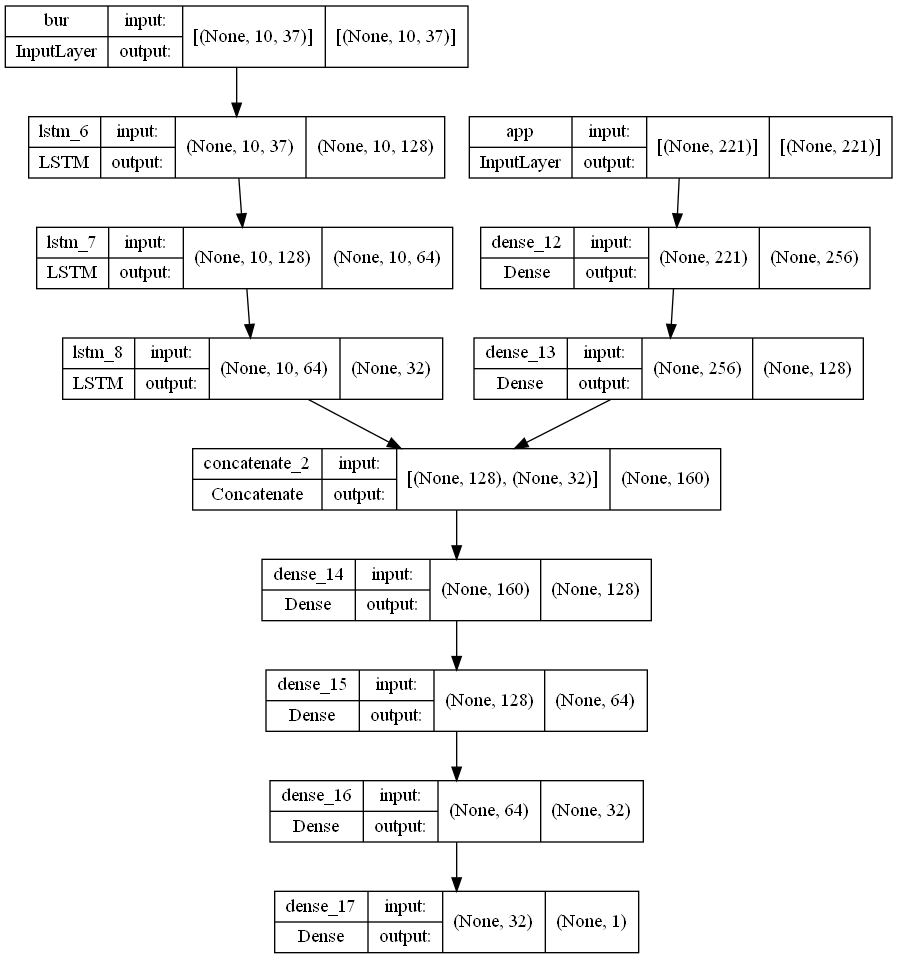

In [99]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TR')
from IPython.display import Image
image = Image("model.png")
image

In [69]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bur (InputLayer)               [(None, 10, 37)]     0           []                               
                                                                                                  
 app (InputLayer)               [(None, 229)]        0           []                               
                                                                                                  
 lstm_9 (LSTM)                  (None, 10, 128)      84992       ['bur[0][0]']                    
                                                                                                  
 dense_18 (Dense)               (None, 256)          58880       ['app[0][0]']                    
                                                                                            

In [70]:
model.layers[0].input

<KerasTensor: shape=(None, 10, 37) dtype=float32 (created by layer 'bur')>

In [71]:
model.layers[1].input

<KerasTensor: shape=(None, 229) dtype=float32 (created by layer 'app')>

In [72]:
functor = tf.keras.backend.function([model.layers[0].input,model.layers[1].input],[model.layers[-2].output])
predict=functor([X_train["bur"], X_train["app"]])

In [73]:
predict

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.039985  , 3.1487112 , 0.        , ..., 0.        , 0.        ,
         1.8077103 ],
        [0.90510726, 3.1285634 , 0.        , ..., 0.        , 0.        ,
         2.0972536 ],
        ...,
        [0.685387  , 3.0161686 , 0.        , ..., 0.        , 0.        ,
         1.9948491 ],
        [0.31084344, 1.2012154 , 0.        , ..., 0.        , 0.        ,
         0.76735926],
        [0.7086395 , 2.2961738 , 0.        , ..., 0.        , 0.        ,
         1.4855449 ]], dtype=float32)]

In [74]:
predict[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.039985  , 3.1487112 , 0.        , ..., 0.        , 0.        ,
        1.8077103 ],
       [0.90510726, 3.1285634 , 0.        , ..., 0.        , 0.        ,
        2.0972536 ],
       ...,
       [0.685387  , 3.0161686 , 0.        , ..., 0.        , 0.        ,
        1.9948491 ],
       [0.31084344, 1.2012154 , 0.        , ..., 0.        , 0.        ,
        0.76735926],
       [0.7086395 , 2.2961738 , 0.        , ..., 0.        , 0.        ,
        1.4855449 ]], dtype=float32)

In [75]:
array = np.array(predict[0], dtype = np.float64)

In [76]:
array.shape

(307511, 32)

In [77]:
columns = ["LSTM_"+str(i) for i in range(1,33)]

In [78]:
columns

['LSTM_1',
 'LSTM_2',
 'LSTM_3',
 'LSTM_4',
 'LSTM_5',
 'LSTM_6',
 'LSTM_7',
 'LSTM_8',
 'LSTM_9',
 'LSTM_10',
 'LSTM_11',
 'LSTM_12',
 'LSTM_13',
 'LSTM_14',
 'LSTM_15',
 'LSTM_16',
 'LSTM_17',
 'LSTM_18',
 'LSTM_19',
 'LSTM_20',
 'LSTM_21',
 'LSTM_22',
 'LSTM_23',
 'LSTM_24',
 'LSTM_25',
 'LSTM_26',
 'LSTM_27',
 'LSTM_28',
 'LSTM_29',
 'LSTM_30',
 'LSTM_31',
 'LSTM_32']

In [79]:
LSTM_Feature = pd.DataFrame(array, columns = columns)

In [80]:
LSTM_Feature.head(20)

,LSTM_1,LSTM_2,LSTM_3,LSTM_4,LSTM_5,LSTM_6,LSTM_7,LSTM_8,LSTM_9,LSTM_10,...,LSTM_23,LSTM_24,LSTM_25,LSTM_26,LSTM_27,LSTM_28,LSTM_29,LSTM_30,LSTM_31,LSTM_32
0,0.000000,0.000000,0.0,0.839073,0.649568,0.593815,0.000000,0.0,0.000000,0.211975,...,0.000000,0.000000,0.594887,0.823157,0.000000,0.0,0.950104,0.0,0.0,0.000000
1,1.039985,3.148711,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.919652,0.000000,...,0.790860,1.041901,0.000000,0.000000,2.359275,0.0,0.000000,0.0,0.0,1.807710
2,0.905107,3.128563,0.0,0.000000,0.000000,0.000000,0.019673,0.0,3.050143,0.000000,...,0.783513,1.071328,0.000000,0.000000,2.347027,0.0,0.000000,0.0,0.0,2.097254
3,0.904447,2.428540,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.126953,0.000000,...,0.603906,0.771269,0.000000,0.000000,1.739789,0.0,0.000000,0.0,0.0,1.405081
4,0.837116,2.600252,0.0,0.000000,0.000000,0.000000,0.063929,0.0,2.460173,0.000000,...,0.684730,0.846036,0.000000,0.000000,1.928684,0.0,0.000000,0.0,0.0,1.539409
5,0.560879,1.758792,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.697322,0.000000,...,0.402596,0.591173,0.000000,0.000000,1.362304,0.0,0.000000,0.0,0.0,1.137124
6,0.699623,2.903126,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.613667,0.000000,...,0.398368,0.805694,0.000000,0.000000,2.361855,0.0,0.000000,0.0,0.0,1.916938
7,1.191613,3.173437,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.868752,0.000000,...,1.008210,0.852522,0.000000,0.000000,2.212092,0.0,0.000000,0.0,0.0,2.036515
8,0.623422,2.381986,0.0,0.000000,0.000000,0.000000,0.090157,0.0,2.322334,0.000000,...,0.408408,0.773468,0.000000,0.000000,1.849870,0.0,0.000000,0.0,0.0,1.450404
9,1.038616,3.156009,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.795235,0.000000,...,0.892253,0.939608,0.000000,0.000000,2.293224,0.0,0.000000,0.0,0.0,1.907369


In [93]:
SK_ID_CURR = pd.DataFrame(SK_ID_CURR, columns = ["SK_ID_CURR"])

In [94]:
LSTM_Feature

,LSTM_1,LSTM_2,LSTM_3,LSTM_4,LSTM_5,LSTM_6,LSTM_7,LSTM_8,LSTM_9,LSTM_10,...,LSTM_23,LSTM_24,LSTM_25,LSTM_26,LSTM_27,LSTM_28,LSTM_29,LSTM_30,LSTM_31,LSTM_32
0,0.000000,0.000000,0.0,0.839073,0.649568,0.593815,0.000000,0.0,0.000000,0.211975,...,0.000000,0.000000,0.594887,0.823157,0.000000,0.0,0.950104,0.0,0.0,0.000000
1,1.039985,3.148711,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.919652,0.000000,...,0.790860,1.041901,0.000000,0.000000,2.359275,0.0,0.000000,0.0,0.0,1.807710
2,0.905107,3.128563,0.0,0.000000,0.000000,0.000000,0.019673,0.0,3.050143,0.000000,...,0.783513,1.071328,0.000000,0.000000,2.347027,0.0,0.000000,0.0,0.0,2.097254
3,0.904447,2.428540,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.126953,0.000000,...,0.603906,0.771269,0.000000,0.000000,1.739789,0.0,0.000000,0.0,0.0,1.405081
4,0.837116,2.600252,0.0,0.000000,0.000000,0.000000,0.063929,0.0,2.460173,0.000000,...,0.684730,0.846036,0.000000,0.000000,1.928684,0.0,0.000000,0.0,0.0,1.539409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.516439,2.120059,0.0,0.000000,0.000000,0.000000,0.047208,0.0,2.083321,0.000000,...,0.581871,0.701576,0.000000,0.000000,1.583267,0.0,0.000000,0.0,0.0,1.475544
307507,0.261048,1.526152,0.0,0.000000,0.000000,0.000000,0.011034,0.0,1.599446,0.000000,...,0.209980,0.633303,0.000000,0.000000,1.245608,0.0,0.000000,0.0,0.0,0.854814
307508,0.685387,3.016169,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.249999,0.000000,...,0.629552,1.033483,0.000000,0.000000,2.264818,0.0,0.000000,0.0,0.0,1.994849
307509,0.310843,1.201215,0.0,0.008059,0.000000,0.000000,0.000000,0.0,1.082213,0.000000,...,0.245747,0.437651,0.000000,0.000000,0.880665,0.0,0.000000,0.0,0.0,0.767359


In [95]:
LSTM_Feature = pd.concat([SK_ID_CURR, LSTM_Feature], axis = 1)

In [96]:
LSTM_Feature

,SK_ID_CURR,LSTM_1,LSTM_2,LSTM_3,LSTM_4,LSTM_5,LSTM_6,LSTM_7,LSTM_8,LSTM_9,...,LSTM_23,LSTM_24,LSTM_25,LSTM_26,LSTM_27,LSTM_28,LSTM_29,LSTM_30,LSTM_31,LSTM_32
0,100002,0.000000,0.000000,0.0,0.839073,0.649568,0.593815,0.000000,0.0,0.000000,...,0.000000,0.000000,0.594887,0.823157,0.000000,0.0,0.950104,0.0,0.0,0.000000
1,100003,1.039985,3.148711,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.919652,...,0.790860,1.041901,0.000000,0.000000,2.359275,0.0,0.000000,0.0,0.0,1.807710
2,100004,0.905107,3.128563,0.0,0.000000,0.000000,0.000000,0.019673,0.0,3.050143,...,0.783513,1.071328,0.000000,0.000000,2.347027,0.0,0.000000,0.0,0.0,2.097254
3,100006,0.904447,2.428540,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.126953,...,0.603906,0.771269,0.000000,0.000000,1.739789,0.0,0.000000,0.0,0.0,1.405081
4,100007,0.837116,2.600252,0.0,0.000000,0.000000,0.000000,0.063929,0.0,2.460173,...,0.684730,0.846036,0.000000,0.000000,1.928684,0.0,0.000000,0.0,0.0,1.539409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.516439,2.120059,0.0,0.000000,0.000000,0.000000,0.047208,0.0,2.083321,...,0.581871,0.701576,0.000000,0.000000,1.583267,0.0,0.000000,0.0,0.0,1.475544
307507,456252,0.261048,1.526152,0.0,0.000000,0.000000,0.000000,0.011034,0.0,1.599446,...,0.209980,0.633303,0.000000,0.000000,1.245608,0.0,0.000000,0.0,0.0,0.854814
307508,456253,0.685387,3.016169,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.249999,...,0.629552,1.033483,0.000000,0.000000,2.264818,0.0,0.000000,0.0,0.0,1.994849
307509,456254,0.310843,1.201215,0.0,0.008059,0.000000,0.000000,0.000000,0.0,1.082213,...,0.245747,0.437651,0.000000,0.000000,0.880665,0.0,0.000000,0.0,0.0,0.767359


In [98]:
LSTM_Feature.to_csv("C:/data/processing_data/LSTM_Feature.csv",index= False)

In [3]:
p = pd.read_csv("C:/data/processing_data/LSTM_Feature.csv")

In [5]:
p.replace([np.inf, -np.inf], np.nan, inplace=True)
p.fillna(0, inplace=True)

In [7]:
p.to_csv("C:/data/processing_data/LSTM_Feature.csv",index= False)